In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Nutrition.csv to Nutrition.csv
User uploaded file "Nutrition.csv" with length 33203588 bytes


In [2]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
nutrition_data = pd.read_csv('Nutrition.csv')

In [4]:
# Filter data from 2011 to 2021 and for U.S. states and territories
filtered_data = nutrition_data[(nutrition_data['YearStart'] >= 2011) &
                               (nutrition_data['YearEnd'] <= 2021) &
                               (nutrition_data['LocationAbbr'] != 'US')]

In [5]:
# Filter data from 2011 to 2021 and for U.S. states and territories
filtered_data = nutrition_data[(nutrition_data['YearStart'] >= 2011) &
                               (nutrition_data['YearEnd'] <= 2021) &
                               (nutrition_data['LocationAbbr'] != 'US')]

In [6]:
# Selecting relevant questions related to obesity and physical activity
obesity_question = "Percent of adults aged 18 years and older who have obesity"
physical_activity_question = "Percent of adults who engage in no leisure-time physical activity"

In [7]:
# Filter data for obesity rates and physical activity
obesity_data = filtered_data[filtered_data['Question'] == obesity_question]
physical_activity_data = filtered_data[filtered_data['Question'] == physical_activity_question]

In [35]:
filtered_data.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [8]:
obesity_data.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
1,2014,2014,GU,Guam,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(13.444304, 144.793731)",OWS,OWS1,Q036,VALUE,66,Education,High school graduate,EDU,EDUHSGRAD
7,2012,2012,DC,District of Columbia,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(38.890371385, -77.031961127)",OWS,OWS1,Q036,VALUE,11,Education,Less than high school,EDU,EDUHS
9,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Age (years),25 - 34,AGEYR,AGEYR2534
17,2015,2015,GU,Guam,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(13.444304, 144.793731)",OWS,OWS1,Q036,VALUE,66,Age (years),55 - 64,AGEYR,AGEYR5564
18,2011,2011,RI,Rhode Island,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(41.708280193, -71.522470314)",OWS,OWS1,Q036,VALUE,44,Race/Ethnicity,Other,RACE,RACEOTH


In [9]:
# Group data by state and calculate mean values
mean_obesity_by_state = obesity_data.groupby('LocationAbbr')['Data_Value'].mean()
mean_physical_activity_by_state = physical_activity_data.groupby('LocationAbbr')['Data_Value'].mean()

In [10]:
# Print mean obesity and physical activity rates for each state
print("Mean Obesity Rates by State:\n", mean_obesity_by_state)
print("\nMean Physical Activity Rates by State:\n", mean_physical_activity_by_state)

Mean Obesity Rates by State:
 LocationAbbr
AK    30.297133
AL    35.589416
AR    35.665580
AZ    29.354576
CA    26.343345
CO    22.944746
CT    27.733101
DC    24.764621
DE    31.400730
FL    27.037218
GA    30.690941
GU    31.171000
HI    25.275175
IA    33.026937
ID    29.733333
IL    30.340293
IN    33.393380
KS    32.884483
KY    34.647080
LA    35.720513
MA    25.336713
MD    30.283108
ME    29.974254
MI    32.460208
MN    28.995862
MO    33.056631
MS    37.087149
MT    27.309023
NC    31.839860
ND    33.129119
NE    32.072917
NH    28.298859
NJ    26.881679
NM    29.491549
NV    27.727817
NY    26.494464
OH    32.545548
OK    34.433569
OR    28.688727
PA    30.668478
PR    30.820635
RI    28.060638
SC    33.174394
SD    32.157955
TN    33.806391
TX    32.482007
UT    26.744444
VA    30.152613
VI    34.354348
VT    27.220455
WA    28.419868
WI    32.305714
WV    37.258527
WY    28.958462
Name: Data_Value, dtype: float64

Mean Physical Activity Rates by State:
 LocationAbbr
AK    

In [11]:
# Correlation Analysis
combined_data = pd.merge(mean_obesity_by_state, mean_physical_activity_by_state, on='LocationAbbr')
combined_data.columns = ['Mean_Obesity_Rate', 'Mean_Physical_Activity_Rate']
correlation = combined_data.corr()
print("\nCorrelation between Obesity Rates and Physical Activity Levels:\n", correlation)


Correlation between Obesity Rates and Physical Activity Levels:
                              Mean_Obesity_Rate  Mean_Physical_Activity_Rate
Mean_Obesity_Rate                     1.000000                     0.592273
Mean_Physical_Activity_Rate           0.592273                     1.000000


In [34]:
combined_data.columns

Index(['Mean_Obesity_Rate', 'Mean_Physical_Activity_Rate'], dtype='object')

In [12]:
# ANOVA test to compare obesity rates across states
f_value, p_value = stats.f_oneway(*[group['Data_Value'].dropna() for name, group in obesity_data.groupby('LocationAbbr')])
print(f"ANOVA Test for Obesity Rates: F-value = {f_value}, P-value = {p_value}")

ANOVA Test for Obesity Rates: F-value = 68.04735785976914, P-value = 0.0


In [13]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Perform ANOVA
f_value, p_value = stats.f_oneway(*[group['Data_Value'].dropna() for name, group in obesity_data.groupby('LocationAbbr')])

# Check if the results are significant before proceeding with Tukey HSD
if p_value < 0.05:
    # Perform Tukey HSD post-hoc test
    tukey_result = pairwise_tukeyhsd(endog=obesity_data['Data_Value'], groups=obesity_data['LocationAbbr'], alpha=0.05)
    print(tukey_result)
else:
    print("ANOVA results are not significant; post-hoc test is not necessary.")


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower upper reject
-----------------------------------------------
    AK     AL      nan   nan   nan   nan  False
    AK     AR      nan   nan   nan   nan  False
    AK     AZ      nan   nan   nan   nan  False
    AK     CA      nan   nan   nan   nan  False
    AK     CO      nan   nan   nan   nan  False
    AK     CT      nan   nan   nan   nan  False
    AK     DC      nan   nan   nan   nan  False
    AK     DE      nan   nan   nan   nan  False
    AK     FL      nan   nan   nan   nan  False
    AK     GA      nan   nan   nan   nan  False
    AK     GU      nan   nan   nan   nan  False
    AK     HI      nan   nan   nan   nan  False
    AK     IA      nan   nan   nan   nan  False
    AK     ID      nan   nan   nan   nan  False
    AK     IL      nan   nan   nan   nan  False
    AK     IN      nan   nan   nan   nan  False
    AK     KS      nan   nan   nan   nan  False
    AK     KY      nan   nan   nan  

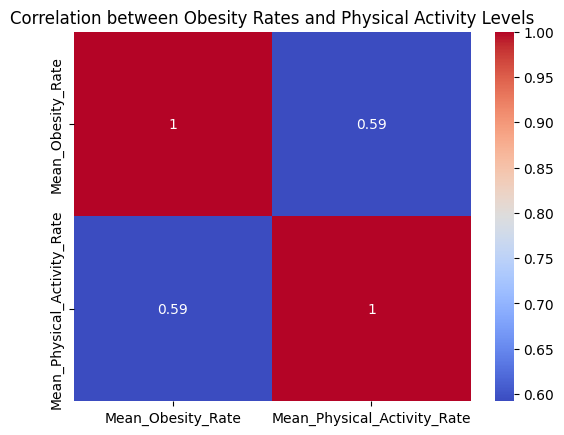

In [14]:
# Visualizing the Correlation
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Obesity Rates and Physical Activity Levels')
plt.show()

In [15]:
correlation

,Mean_Obesity_Rate,Mean_Physical_Activity_Rate
Mean_Obesity_Rate,1.000000,0.592273
Mean_Physical_Activity_Rate,0.592273,1.000000


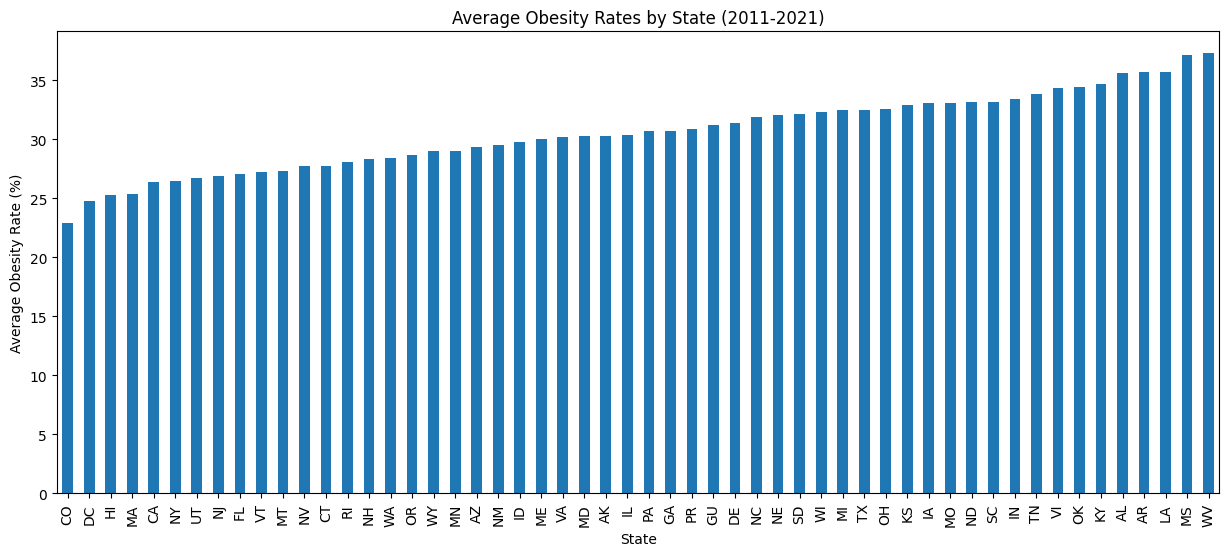

In [16]:
# Visualization
plt.figure(figsize=(15, 6))
mean_obesity_by_state.sort_values().plot(kind='bar')
plt.title('Average Obesity Rates by State (2011-2021)')
plt.ylabel('Average Obesity Rate (%)')
plt.xlabel('State')
plt.show()

In [17]:
mean_obesity_by_state.sort_values()

LocationAbbr
CO    22.944746
DC    24.764621
HI    25.275175
MA    25.336713
CA    26.343345
NY    26.494464
UT    26.744444
NJ    26.881679
FL    27.037218
VT    27.220455
MT    27.309023
NV    27.727817
CT    27.733101
RI    28.060638
NH    28.298859
WA    28.419868
OR    28.688727
WY    28.958462
MN    28.995862
AZ    29.354576
NM    29.491549
ID    29.733333
ME    29.974254
VA    30.152613
MD    30.283108
AK    30.297133
IL    30.340293
PA    30.668478
GA    30.690941
PR    30.820635
GU    31.171000
DE    31.400730
NC    31.839860
NE    32.072917
SD    32.157955
WI    32.305714
MI    32.460208
TX    32.482007
OH    32.545548
KS    32.884483
IA    33.026937
MO    33.056631
ND    33.129119
SC    33.174394
IN    33.393380
TN    33.806391
VI    34.354348
OK    34.433569
KY    34.647080
AL    35.589416
AR    35.665580
LA    35.720513
MS    37.087149
WV    37.258527
Name: Data_Value, dtype: float64

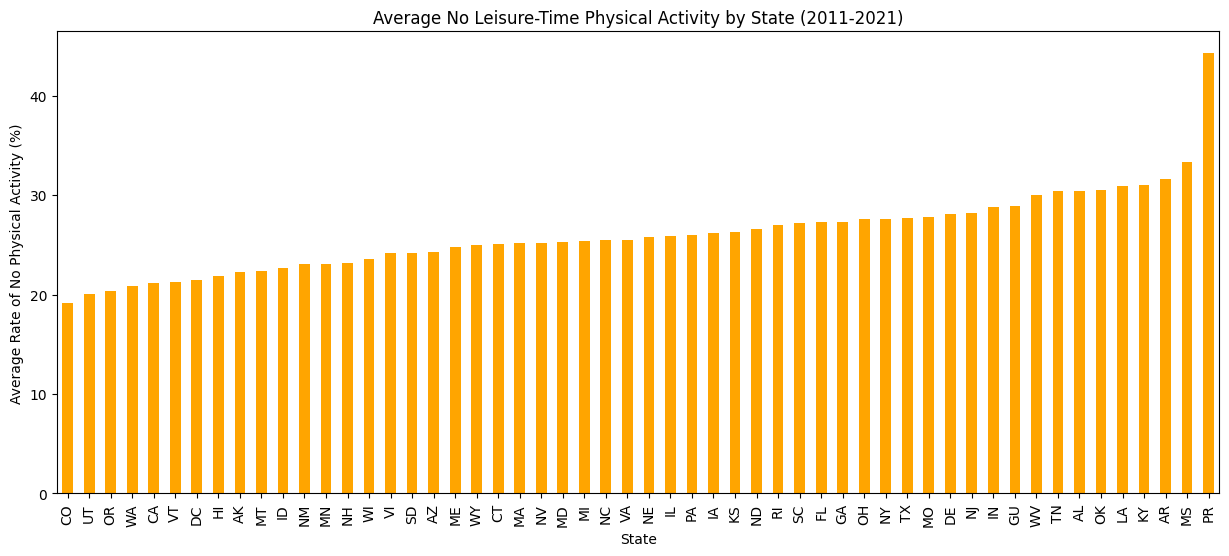

In [18]:
plt.figure(figsize=(15, 6))
mean_physical_activity_by_state.sort_values().plot(kind='bar', color='orange')
plt.title('Average No Leisure-Time Physical Activity by State (2011-2021)')
plt.ylabel('Average Rate of No Physical Activity (%)')
plt.xlabel('State')
plt.show()

In [19]:
# Group data by YearStart and calculate mean values for obesity and physical activity
annual_obesity_trends = obesity_data.groupby('YearStart')['Data_Value'].mean().reset_index()
annual_physical_activity_trends = physical_activity_data.groupby('YearStart')['Data_Value'].mean().reset_index()

In [20]:
print("Annual trends in obesity rates" , annual_physical_activity_trends)

Annual trends in obesity rates     YearStart  Data_Value
0        2011   26.500383
1        2012   23.895183
2        2013   26.852403
3        2014   24.230415
4        2015   27.070150
5        2016   24.895186
6        2017   27.981622
7        2018   25.642402
8        2019   27.783763
9        2020   24.933456
10       2021   25.438309


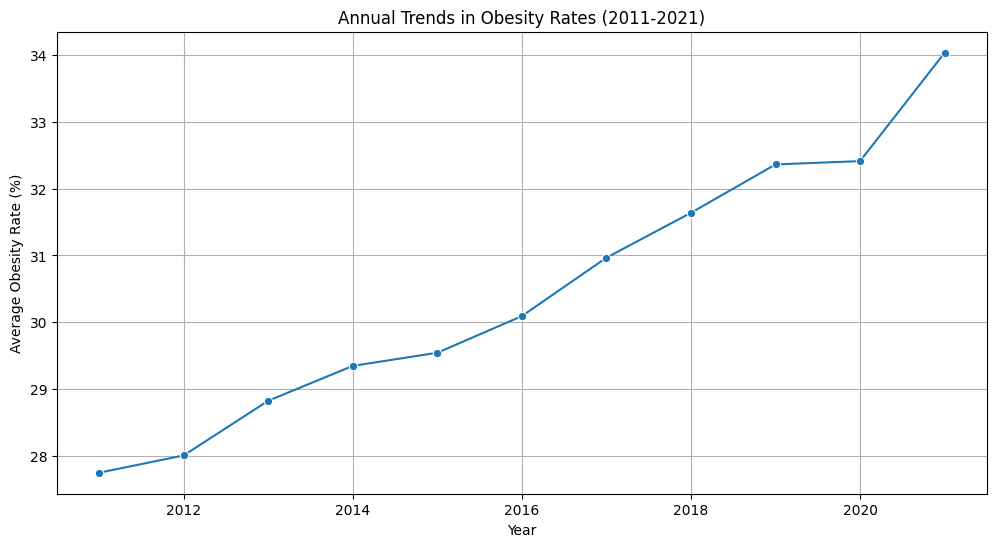

In [21]:
# Visualizing the trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearStart', y='Data_Value', data=annual_obesity_trends, marker='o')
plt.title('Annual Trends in Obesity Rates (2011-2021)')
plt.xlabel('Year')
plt.ylabel('Average Obesity Rate (%)')
plt.grid(True)
plt.show()

In [22]:
print('Annual Trends in No Leisure-Time Physical Activity (2011-2021)', annual_physical_activity_trends)

Annual Trends in No Leisure-Time Physical Activity (2011-2021)     YearStart  Data_Value
0        2011   26.500383
1        2012   23.895183
2        2013   26.852403
3        2014   24.230415
4        2015   27.070150
5        2016   24.895186
6        2017   27.981622
7        2018   25.642402
8        2019   27.783763
9        2020   24.933456
10       2021   25.438309


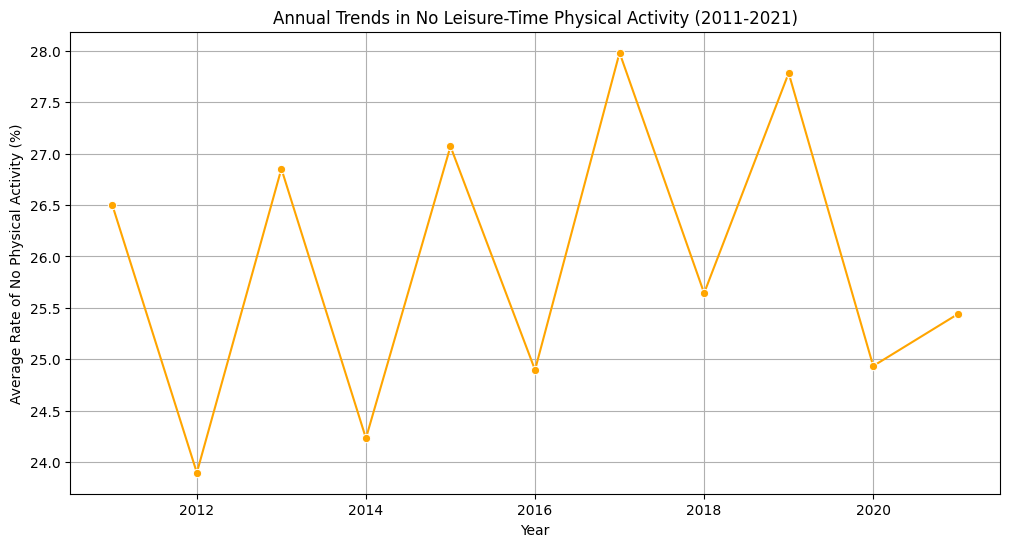

In [23]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearStart', y='Data_Value', data=annual_physical_activity_trends, marker='o', color='orange')
plt.title('Annual Trends in No Leisure-Time Physical Activity (2011-2021)')
plt.xlabel('Year')
plt.ylabel('Average Rate of No Physical Activity (%)')
plt.grid(True)
plt.show()

In [24]:
print('Annual Trends in No Leisure-Time Physical Activity (2011-2021)')
annual_physical_activity_trends

Annual Trends in No Leisure-Time Physical Activity (2011-2021)


,YearStart,Data_Value
0,2011,26.500383
1,2012,23.895183
2,2013,26.852403
3,2014,24.230415
4,2015,27.070150
5,2016,24.895186
6,2017,27.981622
7,2018,25.642402
8,2019,27.783763
9,2020,24.933456


In [25]:
# Focus on obesity and physical activity questions
obesity_question = "Percent of adults aged 18 years and older who have obesity"
physical_activity_question = "Percent of adults who engage in no leisure-time physical activity"

# Filter data for obesity and physical activity, focusing on education levels
obesity_data = filtered_data[(filtered_data['Question'] == obesity_question) &
                             (filtered_data['StratificationCategory1'] == 'Education')]
physical_activity_data = filtered_data[(filtered_data['Question'] == physical_activity_question) &
                                       (filtered_data['StratificationCategory1'] == 'Education')]

In [26]:
# Group data by education level and calculate mean values
mean_obesity_by_education = obesity_data.groupby('Stratification1')['Data_Value'].mean()
mean_physical_activity_by_education = physical_activity_data.groupby('Stratification1')['Data_Value'].mean()

In [27]:
# Print mean obesity and physical activity rates for each education level
print("Mean Obesity Rates by Education Level:\n", mean_obesity_by_education)
print("\nMean Physical Activity Rates by Education Level:\n", mean_physical_activity_by_education)

Mean Obesity Rates by Education Level:
 Stratification1
College graduate                    24.442215
High school graduate                32.425606
Less than high school               34.189273
Some college or technical school    31.857439
Name: Data_Value, dtype: float64

Mean Physical Activity Rates by Education Level:
 Stratification1
College graduate                    13.950780
High school graduate                30.573137
Less than high school               41.024610
Some college or technical school    22.835702
Name: Data_Value, dtype: float64


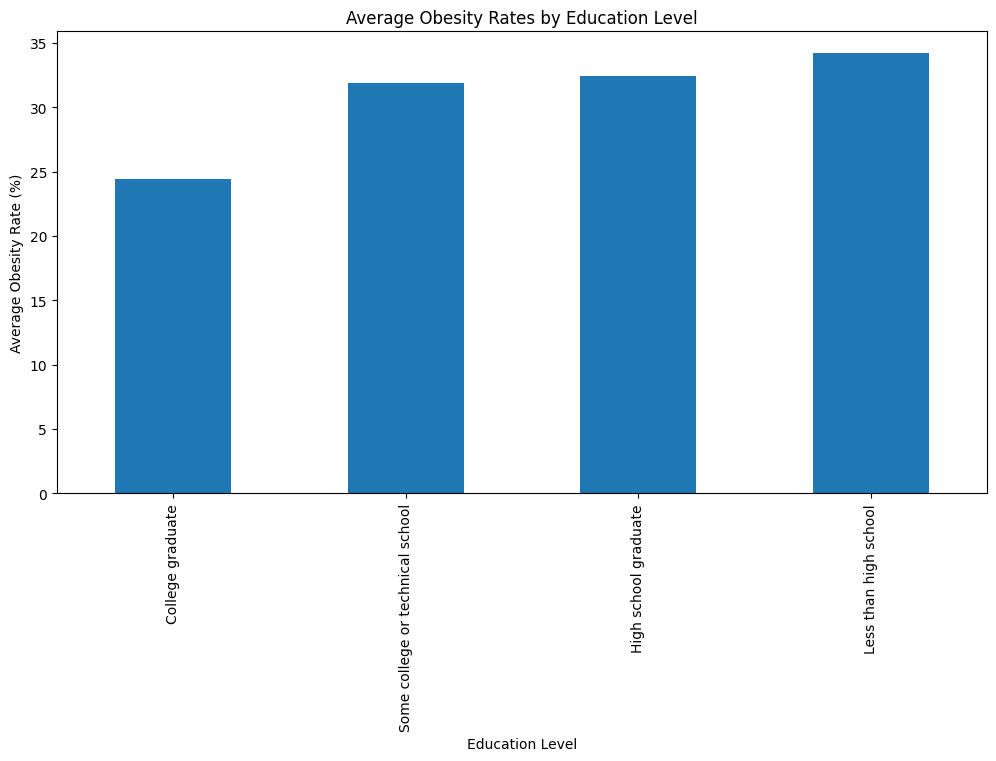

In [28]:
# Visualization
plt.figure(figsize=(12, 6))
mean_obesity_by_education.sort_values().plot(kind='bar')
plt.title('Average Obesity Rates by Education Level')
plt.ylabel('Average Obesity Rate (%)')
plt.xlabel('Education Level')
plt.show()

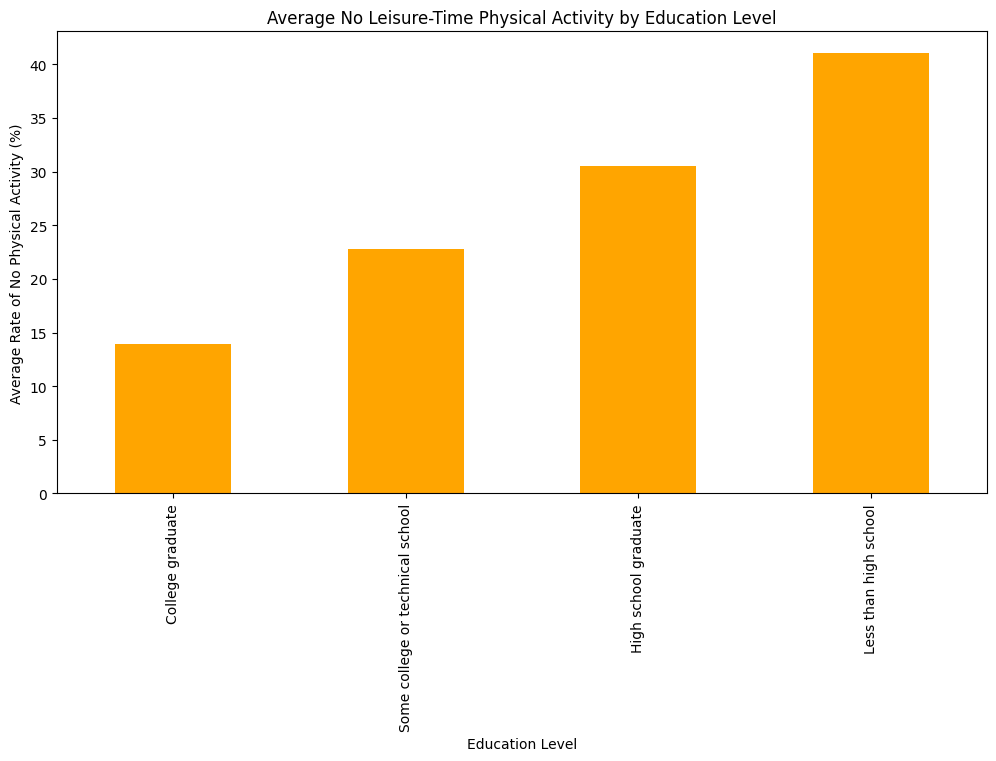

In [29]:
plt.figure(figsize=(12, 6))
mean_physical_activity_by_education.sort_values().plot(kind='bar', color='orange')
plt.title('Average No Leisure-Time Physical Activity by Education Level')
plt.ylabel('Average Rate of No Physical Activity (%)')
plt.xlabel('Education Level')
plt.show()

In [30]:
# Focus on questions related to physical activity
physical_activity_questions = filtered_data[filtered_data['Class'] == 'Physical Activity']

# Group data by year and question, then calculate mean values
annual_trends = physical_activity_questions.groupby(['YearStart', 'Question'])['Data_Value'].mean().reset_index()

# Pivot the data for easier analysis
pivot_trends = annual_trends.pivot(index='YearStart', columns='Question', values='Data_Value')

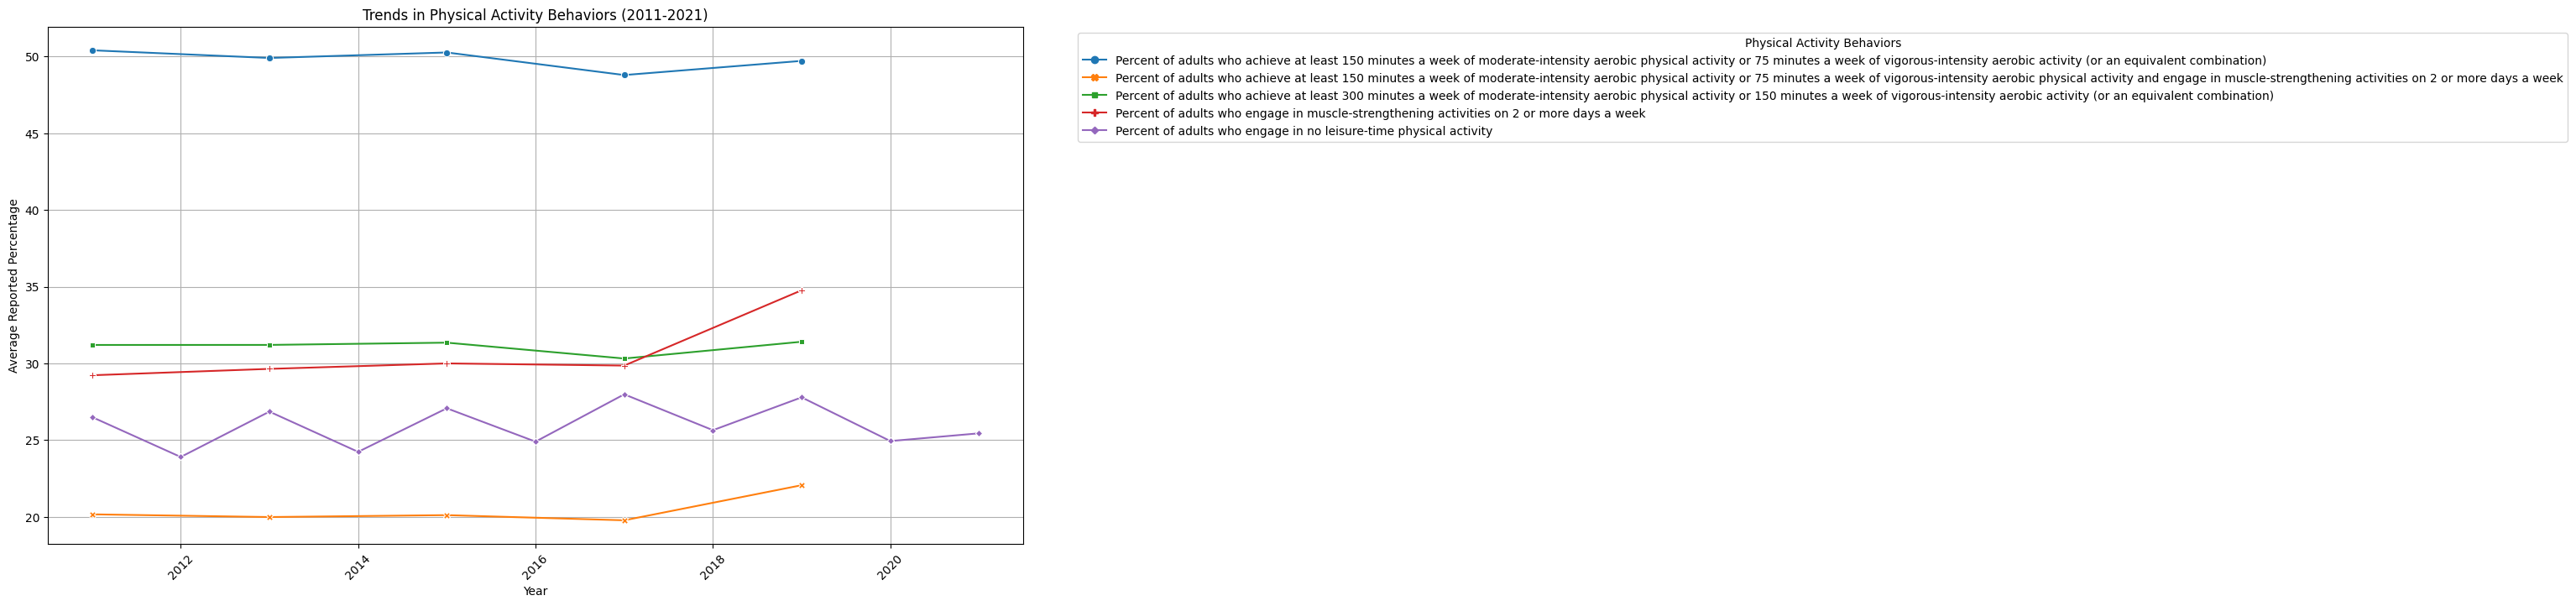

In [31]:
# Plotting the trends for each physical activity behavior over time
plt.figure(figsize=(15, 8))
sns.lineplot(data=pivot_trends, dashes=False, markers=True)
plt.title('Trends in Physical Activity Behaviors (2011-2021)')
plt.xlabel('Year')
plt.ylabel('Average Reported Percentage')
plt.xticks(rotation=45)
plt.legend(title='Physical Activity Behaviors', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [32]:
pivot_trends

Question,Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week,Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),Percent of adults who engage in muscle-strengthening activities on 2 or more days a week,Percent of adults who engage in no leisure-time physical activity
YearStart,,,,,
2011,50.413462,20.156626,31.199923,29.223850,26.500383
2012,NaN,NaN,NaN,NaN,23.895183
2013,49.911682,19.979128,31.202804,29.640171,26.852403
2014,NaN,NaN,NaN,NaN,24.230415
2015,50.270739,20.104151,31.349548,29.996310,27.070150
2016,NaN,NaN,NaN,NaN,24.895186
2017,48.798509,19.766642,30.315224,29.854959,27.981622
2018,NaN,NaN,NaN,NaN,25.642402
2019,49.721390,22.055479,31.409015,34.766006,27.783763


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Remove rows where the target variable is NaN
cleaned_data = filtered_data.dropna(subset=['Data_Value'])

# Define the preprocessing for numerical and categorical data
numerical_preprocessor = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_preprocessor = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_preprocessor, ['Low_Confidence_Limit', 'High_Confidence_Limit ', 'Sample_Size']),
        ('cat', categorical_preprocessor, ['LocationAbbr', 'Education', 'Gender', 'Income', 'Race/Ethnicity'])
    ])

# Define features (X) and target (y)
X = cleaned_data[['YearStart', 'LocationAbbr', 'Education', 'Gender', 'Income', 'Race/Ethnicity', 'Low_Confidence_Limit', 'High_Confidence_Limit ', 'Sample_Size']]
y = cleaned_data['Data_Value']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define multiple models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - MSE: {mse}, R2: {r2}')

Linear Regression - MSE: 0.11011678799149409, R2: 0.9989136086640333
Random Forest - MSE: 0.005385296647662738, R2: 0.9999468696851194
Gradient Boosting - MSE: 0.1041238054297875, R2: 0.9989727342928352
K-Nearest Neighbors - MSE: 1.6639065217391305, R2: 0.9835842139782045
